In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("LoanApprovalPrediction.csv")

# Display the first few rows of the dataset
data.head(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Identify categorical columns
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 6


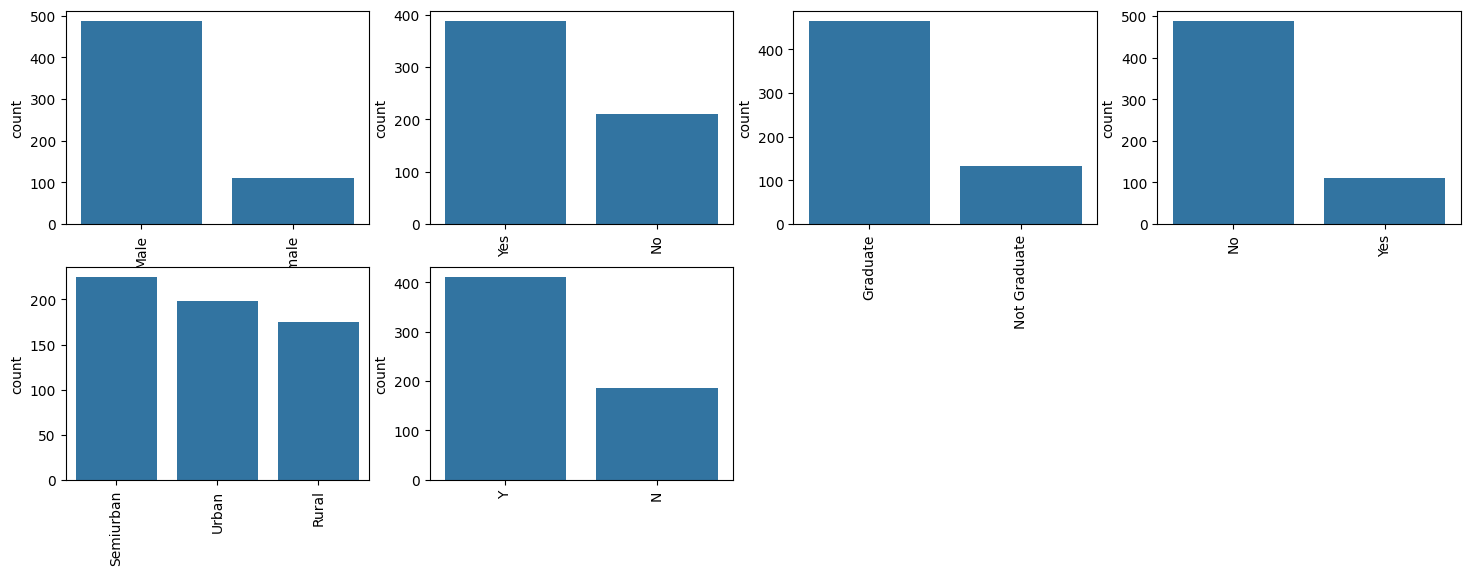

In [4]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1


In [5]:
from sklearn import preprocessing

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Convert categorical columns to numeric using LabelEncoder
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

In [6]:
# Verify no more categorical variables
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 0


In [8]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

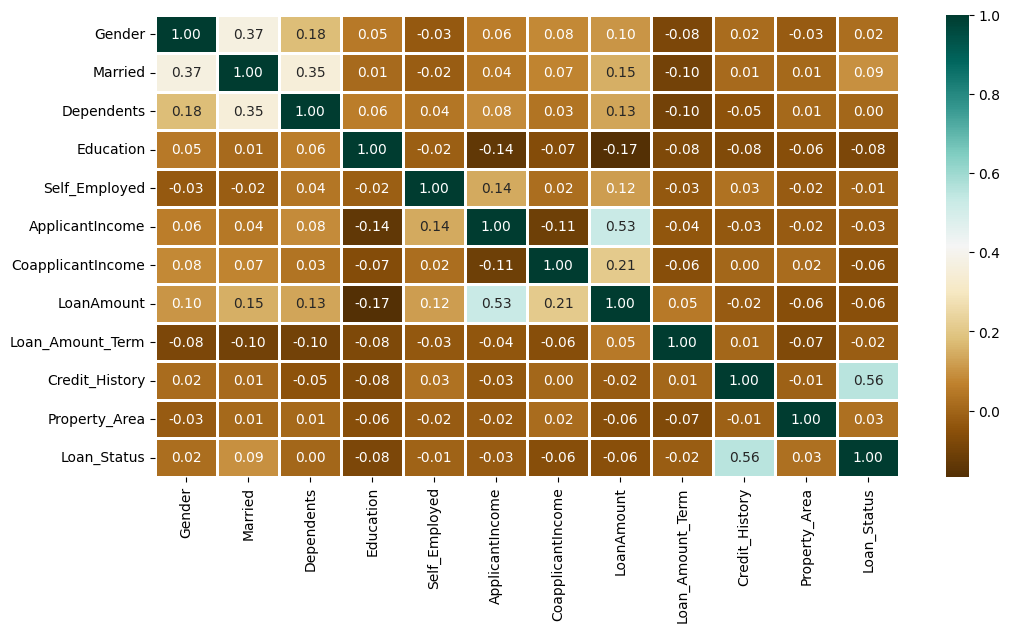

In [9]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)


In [10]:
# Fill missing values with the mean of the respective columns
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

In [11]:
# Check for any remaining missing values
data.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (Y)
X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

# Split data into training and testing sets (60% training, 40% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [13]:
# Display shapes of training and testing sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize models
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=200)  


In [17]:
# Train models and calculate accuracy on scaled data
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_train_scaled)
    print(f"Accuracy score of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_train, Y_pred)}")


Accuracy score of RandomForestClassifier = 98.04469273743017
Accuracy score of KNeighborsClassifier = 81.28491620111731
Accuracy score of SVC = 81.00558659217877
Accuracy score of LogisticRegression = 80.44692737430168


In [18]:
# Evaluate models on the test set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train_scaled, Y_train)
    Y_pred = clf.predict(X_test_scaled)
    print(f"Accuracy score of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_test, Y_pred)}")


Accuracy score of RandomForestClassifier = 82.5
Accuracy score of KNeighborsClassifier = 76.66666666666667
Accuracy score of SVC = 81.25
Accuracy score of LogisticRegression = 82.08333333333333


In [19]:
import joblib

# Save the trained model to a file
joblib.dump(rfc, 'random_forest_model.pkl')
print("Model saved!")

# Save the scaler (StandardScaler used for feature scaling)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved!")


Model saved!
Scaler saved!
